<a href="https://colab.research.google.com/github/ShaikMehraj/EDA/blob/Dev/Face_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats

In [25]:
df = pd.read_csv("/content/fb.csv")

In [3]:
df

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [4]:
df.columns

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [5]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 99003, and columns are 15.


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   userid                 99003 non-null  int64  
 1   age                    99003 non-null  int64  
 2   dob_day                99003 non-null  int64  
 3   dob_year               99003 non-null  int64  
 4   dob_month              99003 non-null  int64  
 5   gender                 98828 non-null  object 
 6   tenure                 99001 non-null  float64
 7   friend_count           99003 non-null  int64  
 8   friendships_initiated  99003 non-null  int64  
 9   likes                  99003 non-null  int64  
 10  likes_received         99003 non-null  int64  
 11  mobile_likes           99003 non-null  int64  
 12  mobile_likes_received  99003 non-null  int64  
 13  www_likes              99003 non-null  int64  
 14  www_likes_received     99003 non-null  int64  
dtypes:

In [7]:
# We can see that above data is already has Data type , doesn't require any changes.

In [8]:
df.isnull().sum()

,0
userid,0
age,0
dob_day,0
dob_year,0
dob_month,0
gender,175
tenure,2
friend_count,0
friendships_initiated,0
likes,0


data does not consist of any symbols , which is good thing as it not require any more data cleaning at cell level
but we can see there are empty value which can effect the Model learning

In [9]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


In [26]:
#concating the Date of birth columns
df['DOB'] = df.apply(lambda x:'%s-%s-%s' % (x['dob_day'],x['dob_month'],x['dob_year']),axis=1)
df['DOB'] = pd.to_datetime(df['DOB']) # Changing the data type

/tmp/ipython-input-2392401567.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DOB'] = pd.to_datetime(df['DOB']) # Changing the data type


In [27]:
df['DOB'].dtype

dtype('<M8[ns]')

In [28]:
df = df.drop(['dob_day',	'dob_year'	,'dob_month'],axis=1)

In [29]:
pd.set_option('display.max_row', None)

#For checking we are not getting invalid data
print(df['age'].value_counts())

age
18     5196
23     4404
19     4391
20     3769
21     3671
25     3641
17     3283
16     3086
22     3032
24     2827
26     2815
15     2618
28     2364
27     2240
33     1999
29     1936
14     1925
30     1716
31     1694
108    1661
32     1443
34     1257
53     1192
35     1175
36     1118
38     1099
43     1063
103    1044
52      995
51      971
37      969
50      966
49      951
54      951
57      932
55      925
63      907
39      902
47      902
48      896
58      893
56      878
44      877
46      851
68      846
42      835
40      835
59      834
61      832
45      826
41      801
60      748
62      736
64      709
66      703
65      693
67      604
13      484
69      460
70      365
71      352
73      330
100     325
72      296
74      281
75      233
93      203
113     202
102     187
94      184
76      178
77      169
78      162
101     157
83      152
80      136
106     125
79      112
81      108
107      98
98       93
84       86
99       83


It is Hard to trust the data where age of above 80 are able to understand and use technology for be on Face book.

In [30]:
print(df['gender'].value_counts())

gender
male      58574
female    40254
Name: count, dtype: int64


In [31]:
df.dropna(inplace = True) #droping the rows in for the values are null ,  as we have large data set it will not effect much on out come.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98826 entries, 0 to 99002
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 98826 non-null  int64         
 1   age                    98826 non-null  int64         
 2   gender                 98826 non-null  object        
 3   tenure                 98826 non-null  float64       
 4   friend_count           98826 non-null  int64         
 5   friendships_initiated  98826 non-null  int64         
 6   likes                  98826 non-null  int64         
 7   likes_received         98826 non-null  int64         
 8   mobile_likes           98826 non-null  int64         
 9   mobile_likes_received  98826 non-null  int64         
 10  www_likes              98826 non-null  int64         
 11  www_likes_received     98826 non-null  int64         
 12  DOB                    98826 non-null  datetime64[ns]
dtypes: dat

We will be removing the rows of data for which age is above 80 , beacuse it is a for loop it will take some time to excetute

In [33]:
for x in df.index:
  if df.loc[x, "age"] > 80:
    df.drop(x, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93182 entries, 0 to 99002
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 93182 non-null  int64         
 1   age                    93182 non-null  int64         
 2   gender                 93182 non-null  object        
 3   tenure                 93182 non-null  float64       
 4   friend_count           93182 non-null  int64         
 5   friendships_initiated  93182 non-null  int64         
 6   likes                  93182 non-null  int64         
 7   likes_received         93182 non-null  int64         
 8   mobile_likes           93182 non-null  int64         
 9   mobile_likes_received  93182 non-null  int64         
 10  www_likes              93182 non-null  int64         
 11  www_likes_received     93182 non-null  int64         
 12  DOB                    93182 non-null  datetime64[ns]
dtypes: dat

In [34]:
df['age'] = pd.to_numeric(df['age'], downcast="integer")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93182 entries, 0 to 99002
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 93182 non-null  int64         
 1   age                    93182 non-null  int8          
 2   gender                 93182 non-null  object        
 3   tenure                 93182 non-null  float64       
 4   friend_count           93182 non-null  int64         
 5   friendships_initiated  93182 non-null  int64         
 6   likes                  93182 non-null  int64         
 7   likes_received         93182 non-null  int64         
 8   mobile_likes           93182 non-null  int64         
 9   mobile_likes_received  93182 non-null  int64         
 10  www_likes              93182 non-null  int64         
 11  www_likes_received     93182 non-null  int64         
 12  DOB                    93182 non-null  datetime64[ns]
dtypes: dat

In [21]:
df.head()

,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DOB
0,2094382,14,male,266.0,0,0,0,0,0,0,0,0,1999-11-19
1,1192601,14,female,6.0,0,0,0,0,0,0,0,0,1999-11-02
2,2083884,14,male,13.0,0,0,0,0,0,0,0,0,1999-11-16
3,1203168,14,female,93.0,0,0,0,0,0,0,0,0,1999-12-25
4,1733186,14,male,82.0,0,0,0,0,0,0,0,0,1999-12-04


In [43]:
dummy_df = pd.get_dummies(df, prefix={'gender':'gender'},drop_first=True, dtype=int)

In [44]:
dummy_df.head()

,userid,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DOB,gender_male
0,2094382,14,266.0,0,0,0,0,0,0,0,0,1999-11-19,1
1,1192601,14,6.0,0,0,0,0,0,0,0,0,1999-11-02,0
2,2083884,14,13.0,0,0,0,0,0,0,0,0,1999-11-16,1
3,1203168,14,93.0,0,0,0,0,0,0,0,0,1999-12-25,0
4,1733186,14,82.0,0,0,0,0,0,0,0,0,1999-12-04,1


In [45]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93182 entries, 0 to 99002
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   userid                 93182 non-null  int64         
 1   age                    93182 non-null  int8          
 2   tenure                 93182 non-null  float64       
 3   friend_count           93182 non-null  int64         
 4   friendships_initiated  93182 non-null  int64         
 5   likes                  93182 non-null  int64         
 6   likes_received         93182 non-null  int64         
 7   mobile_likes           93182 non-null  int64         
 8   mobile_likes_received  93182 non-null  int64         
 9   www_likes              93182 non-null  int64         
 10  www_likes_received     93182 non-null  int64         
 11  DOB                    93182 non-null  datetime64[ns]
 12  gender_male            93182 non-null  int64         
dtypes: dat

In [46]:
dummy_df.describe()

,userid,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,DOB,gender_male
count,9.318200e+04,93182.000000,93182.00000,93182.000000,93182.000000,93182.000000,93182.000000,93182.000000,93182.000000,93182.000000,93182.000000,93182,93182.000000
mean,1.597326e+06,33.353974,502.57597,185.342598,103.002050,156.390805,143.568822,106.797987,84.385708,49.592765,59.183072,1980-02-14 19:06:08.028159936,0.592872
min,1.000008e+06,13.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1933-01-01 00:00:00,0.000000
25%,1.299138e+06,20.000000,220.00000,29.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1968-07-01 00:00:00,0.000000
50%,1.596340e+06,27.000000,397.00000,78.000000,44.000000,10.000000,8.000000,4.000000,4.000000,0.000000,2.000000,1986-04-25 00:00:00,1.000000
75%,1.896225e+06,45.000000,634.00000,194.000000,111.000000,79.000000,57.000000,45.000000,32.000000,6.000000,19.000000,1993-05-17 00:00:00,1.000000
max,2.193542e+06,80.000000,2592.00000,4917.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000,2000-10-27 00:00:00,1.000000
std,3.441139e+05,16.530006,420.18562,370.382207,184.153198,578.714834,1424.802598,449.264283,859.260795,289.642991,618.825448,NaN,0.491302


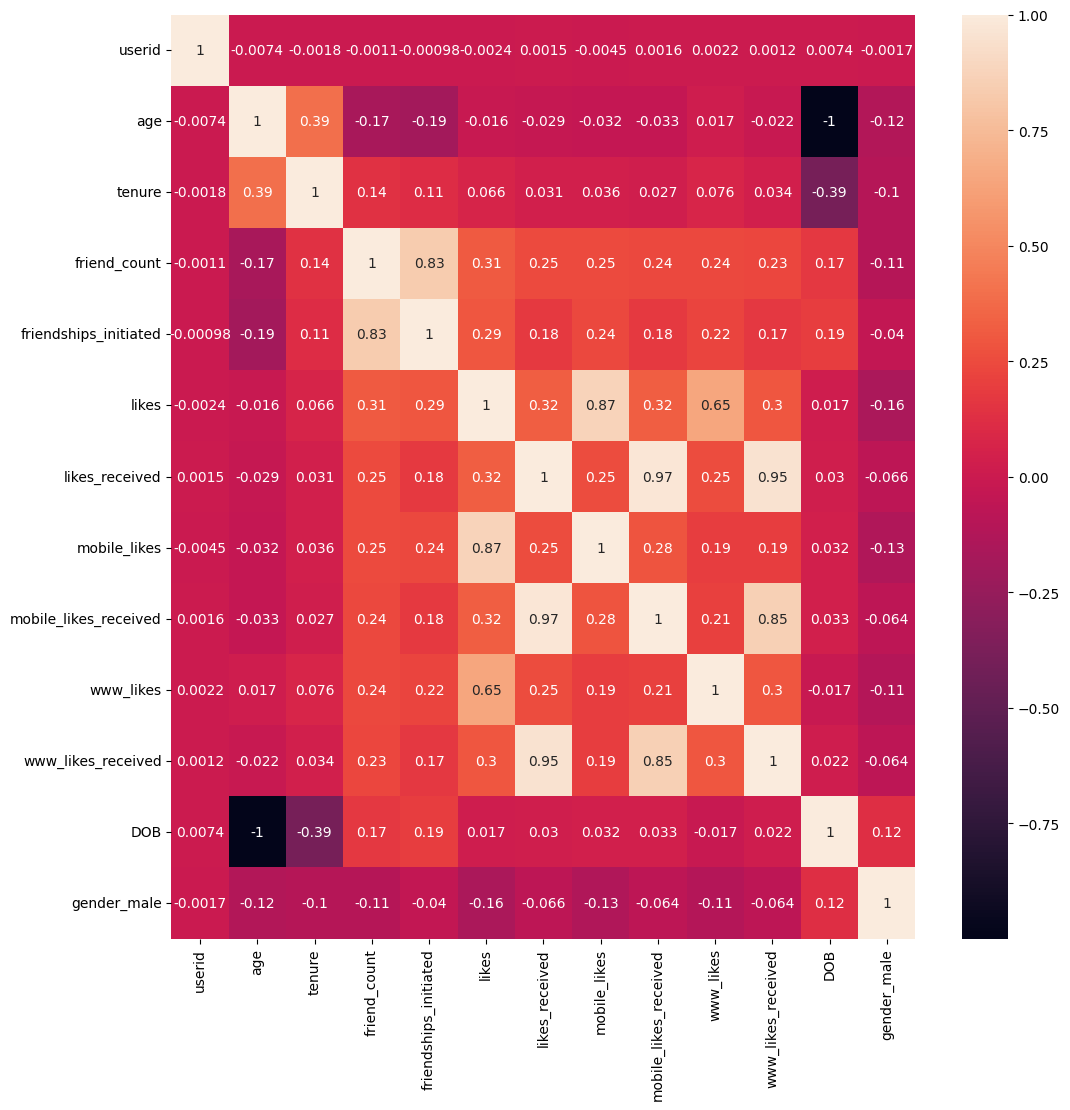

In [50]:
# Plot correlations between variables
plt.figure(figsize=(12, 12))
correlation_matrix = dummy_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()